In [1]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np
%matplotlib inline
image = cv.imread('pics/flw.jpg', 0)
img_min = np.min(image)
img_max = np.max(image)
ret_img = image
for i in range(ret_img.shape[0]):
    for j in range(ret_img.shape[1]):
        ret_img[i][j] =  255*(image[i,j]-img_min)/(img_max-img_min)
image = ret_img.copy()

In [2]:
def apply_kernel(img, kernel):
    K = kernel.shape[0]
    height = img.shape[0] - (K // 2) * 2
    width = img.shape[1] - (K // 2) * 2
    res = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            m = img[i:i+K, j:j+K] * kernel
            res[i][j] = m.sum()
    return np.clip(res, 0, 255).astype(np.uint8)

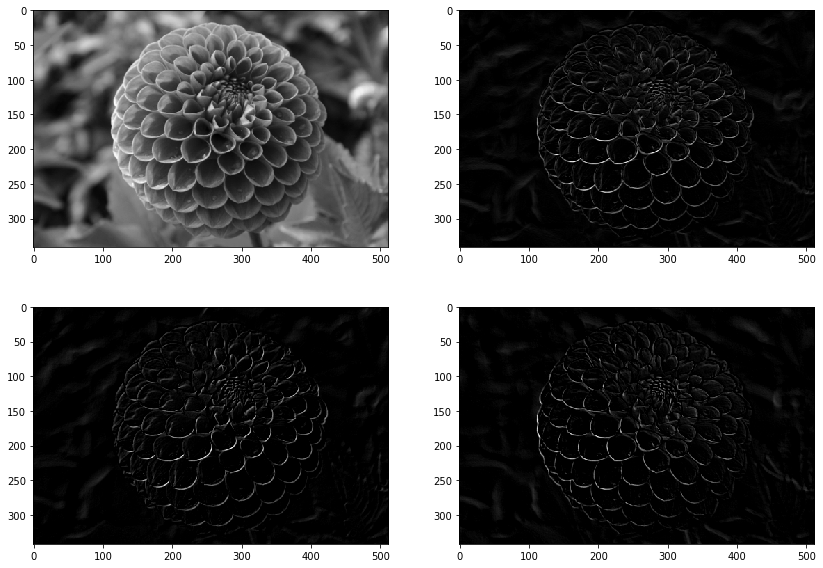

In [3]:
h1 = np.array([
    [1, 0],
    [0, -1]
])
h2 = np.array([
    [0, 1],
    [-1, 0]
])
img_h1 = cv.filter2D(image, -1, h1)
img_h2 = cv.filter2D(image, -1, h2)
img_roberts = np.abs(img_h1) + np.abs(img_h2)

plt.rcParams["figure.figsize"] = [14, 10]
plt.subplot(221)
plt.imshow(image, 'gray')
    
plt.subplot(222)
plt.imshow(img_roberts, 'gray')
    
plt.subplot(223)
plt.imshow(img_h1, 'gray')
    
plt.subplot(224)
plt.imshow(img_h2, 'gray')
    
plt.savefig('pics/flower_roberts.png')
plt.show()

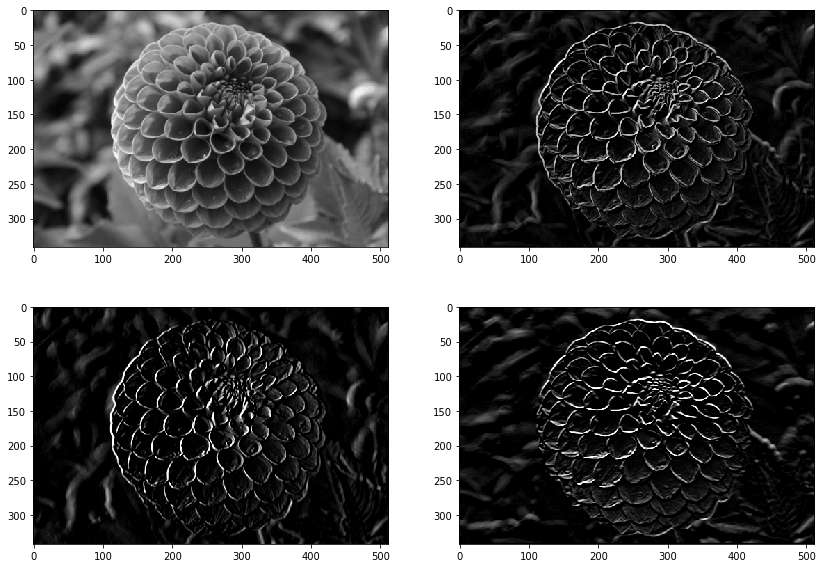

In [4]:
sx = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])
sy = sx.T
img_x = cv.filter2D(image, -1, sx).astype(np.single)
img_y = cv.filter2D(image, -1, sy).astype(np.single)
img_sobel = np.sqrt(img_x ** 2 + img_y ** 2)

plt.rcParams["figure.figsize"] = [14, 10]
plt.subplot(221)
plt.imshow(image, 'gray')
    
plt.subplot(222)
plt.imshow(img_sobel, 'gray')
    
plt.subplot(223)
plt.imshow(img_x, 'gray')
    
plt.subplot(224)
plt.imshow(img_y, 'gray')
    
plt.savefig('pics/flower_sobel.png')
plt.show()    


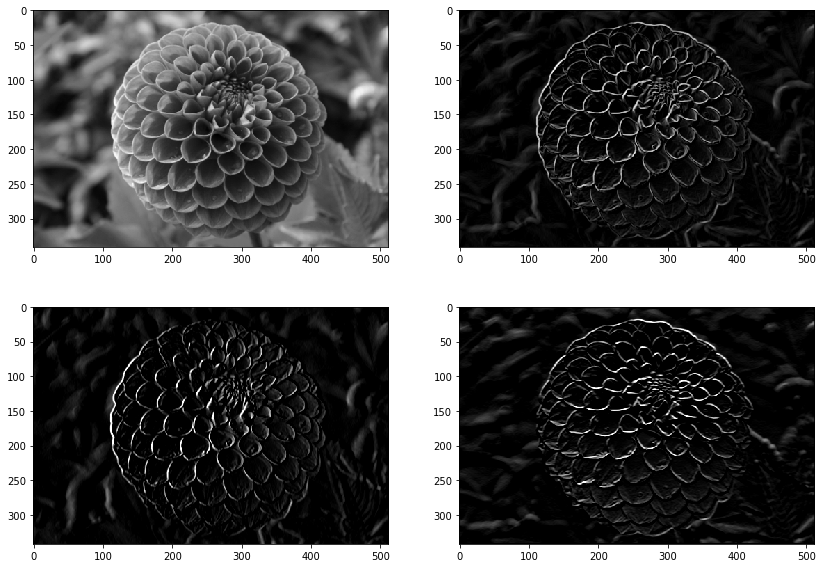

In [5]:
px = np.array([
    [-1, 0, 1], 
    [-1, 0, 1], 
    [-1, 0, 1]]
)
py = px.T
img_x = cv.filter2D(image, -1, px).astype(np.single)
img_y = cv.filter2D(image, -1, py).astype(np.single)
img_prewitt = np.sqrt(img_x ** 2 + img_y ** 2)

plt.rcParams["figure.figsize"] = [14, 10]
plt.subplot(221)
plt.imshow(image, 'gray')
    
plt.subplot(222)
plt.imshow(img_prewitt, 'gray')
    
plt.subplot(223)
plt.imshow(img_x, 'gray')
    
plt.subplot(224)
plt.imshow(img_y, 'gray')
    
plt.savefig('pics/flower_prewitt.png')
plt.show()    

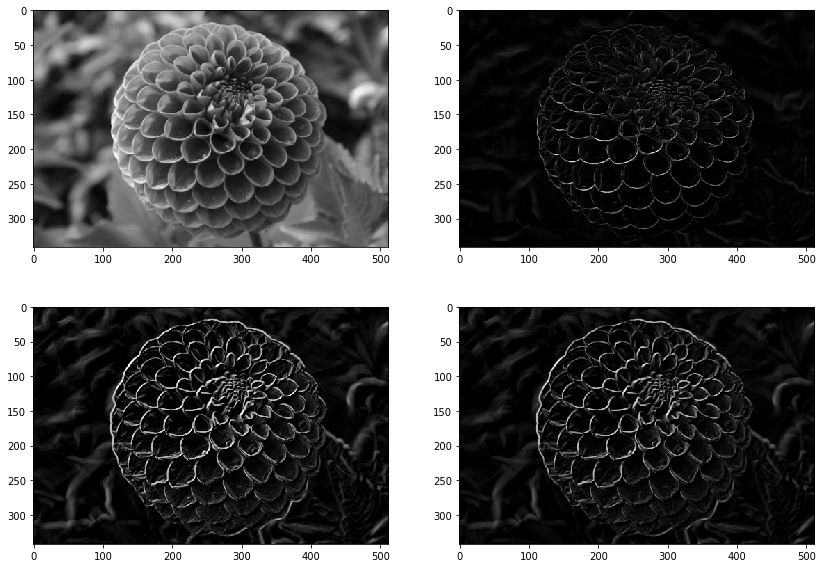

In [6]:
plt.rcParams["figure.figsize"] = [14, 10]
plt.subplot(221)
plt.imshow(image, 'gray')
    
plt.subplot(222)
plt.imshow(img_roberts, 'gray')
    
plt.subplot(223)
plt.imshow(img_sobel, 'gray')
    
plt.subplot(224)
plt.imshow(img_prewitt, 'gray')
    
plt.savefig('pics/flower_all.png')
plt.show()    